# Investors platform

Your investment will be visualized here below on a weekly basis. 


Current starting investment per person:



In [4]:
# TGA 1 PLOT PER RESULTS:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path (update if needed)
file_path = "voorbeeld_ExpDat_R30B70D28.csv"

# Read CSV file, skipping metadata rows
df = pd.read_csv(file_path, encoding="ISO-8859-1", skiprows=30, header=None)

# Manually assign column names (modify if necessary)
df.columns = ["Temperature", "Time", "SomeValue", "Weight%", "Other1", "Other2", "Other3", "Other4"]

# Extract Temperature and Weight data
temp = pd.to_numeric(df["Temperature"], errors="coerce")
weight = pd.to_numeric(df["Weight%"], errors="coerce")

# Drop NaN values (if any)
df_clean = df.dropna()

# Plot TGA (Weight % vs. Temperature)
plt.figure(figsize=(8,6))
plt.plot(df_clean["Temperature"], df_clean["Weight%"], 'b-', linewidth=2, label="TGA (Weight%)")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Weight (%)", fontsize=12)
plt.title("TGA Analysis", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'voorbeeld_ExpDat_R30B70D28.csv'

Error reading file D:/github/TradingBro/book/some_content\ExpDat_A8%DC14; 30-1-2025-2.csv: Length mismatch: Expected axis has 9 elements, new values have 8 elements
Error reading file D:/github/TradingBro/book/some_content\ExpDat_MgO5%D28; 16-1-2025-2_DTG.csv: Length mismatch: Expected axis has 9 elements, new values have 8 elements


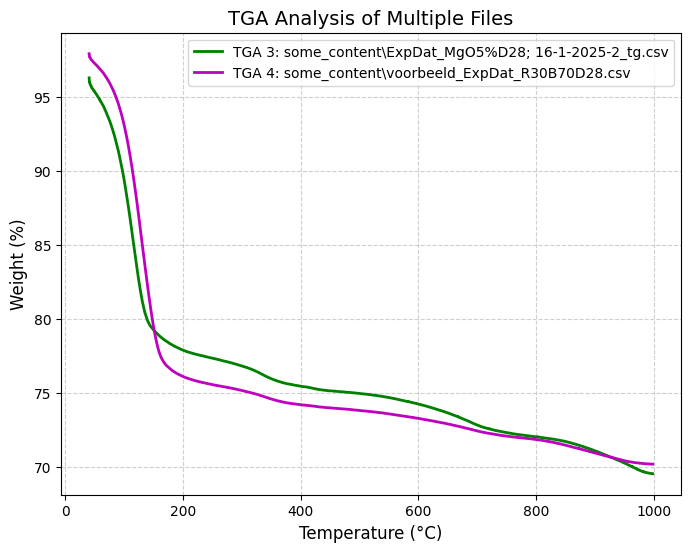

In [12]:
# TGA x amount of PLOTS PER RESULTS:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# List of CSV file paths (Modify or use glob to automatically detect files)
file_paths = glob.glob("D:/github/TradingBro/book/some_content/*.csv")  # Adjust folder path as needed

# Define colors for different datasets
colors = ["b", "r", "g", "m", "c", "y", "k"]  # Add more if needed

plt.figure(figsize=(8,6))

# Loop through each file and plot its TGA data
for i, file_path in enumerate(file_paths):
    try:
        # Read CSV file, skipping metadata rows
        df = pd.read_csv(file_path, encoding="ISO-8859-1", skiprows=30, header=None)

        # Manually assign column names (modify if necessary)
        df.columns = ["Temperature", "Time", "SomeValue", "Weight%", "Other1", "Other2", "Other3", "Other4"]

        # Extract Temperature and Weight data
        temp = pd.to_numeric(df["Temperature"], errors="coerce")
        weight = pd.to_numeric(df["Weight%"], errors="coerce")

        # Drop NaN values (if any)
        df_clean = df.dropna()

        # Plot TGA (Weight % vs. Temperature) with different colors
        plt.plot(df_clean["Temperature"], df_clean["Weight%"], color=colors[i % len(colors)], linewidth=2, label=f"TGA {i+1}: {file_path.split('/')[-1]}")

    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# Plot formatting
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Weight (%)", fontsize=12)
plt.title("TGA Analysis of Multiple Files", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# DTG 

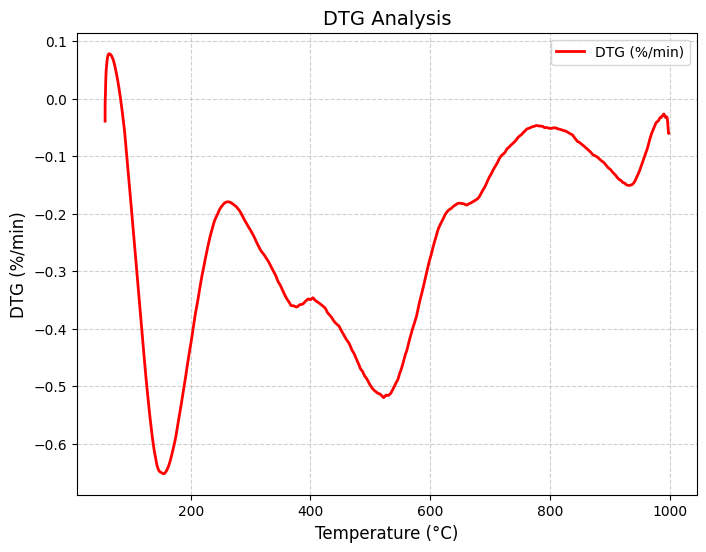

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path (update if needed)
dtg_file_path = "DG_ExpDat_A8%DC28; 14-2-2025-2.csv"  # Ensure correct path

# Read CSV file, skipping metadata rows
df_dtg = pd.read_csv(dtg_file_path, encoding="ISO-8859-1", skiprows=30, header=0)

# Rename columns (modify based on actual structure)
df_dtg.columns = ["Temperature", "Time", "DSC", "Mass%", "GasFlow1", "GasFlow2", "GasFlow3", "DTG", "Sensitivity"]

# Convert relevant columns to numeric
df_dtg["Temperature"] = pd.to_numeric(df_dtg["Temperature"], errors="coerce")
df_dtg["DTG"] = pd.to_numeric(df_dtg["DTG"], errors="coerce")

# Drop NaN values
df_dtg = df_dtg.dropna()

# Plot DTG (%/min) vs. Temperature (°C)
plt.figure(figsize=(8,6))
plt.plot(df_dtg["Temperature"], df_dtg["DTG"], 'r-', linewidth=2, label="DTG (%/min)")
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("DTG (%/min)", fontsize=12)
plt.title("DTG Analysis", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# TGA & DTG multiple files analysis 

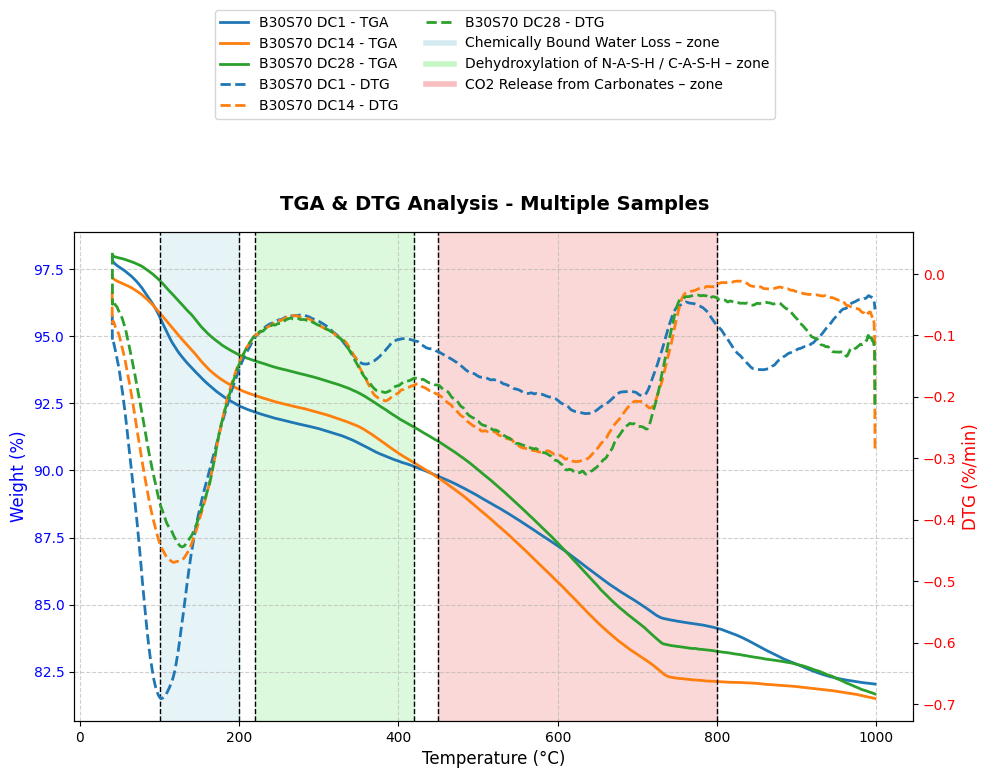

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_B30S70DC1; 14-1-2025-2.csv", "B30S70 DC1 - TGA"),
    ("TG_ExpDat_B30S70DC14; 30-1-2025-2.csv", "B30S70 DC14 - TGA"),
    ("TG_ExpDat_B30S70DC28; 13-2-2025-2.csv", "B30S70 DC28 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_B30S70DC1; 14-1-2025-2.csv", "B30S70 DC1 - DTG"),
    ("DG_ExpDat_B30S70DC14; 30-1-2025-2.csv", "B30S70 DC14 - DTG"),
    ("DG_ExpDat_B30S70DC28; 13-2-2025-2.csv", "B30S70 DC28 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis - Multiple Samples", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


# Analysis mix design: Reference B30S70

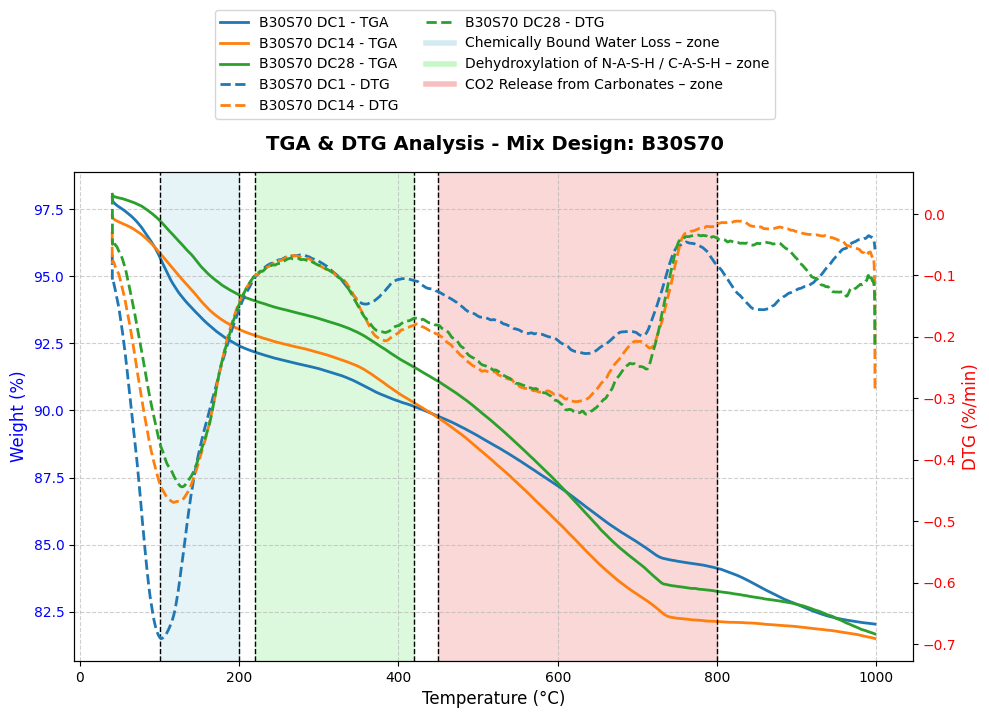

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_B30S70DC1; 14-1-2025-2.csv", "B30S70 DC1 - TGA"),
    ("TG_ExpDat_B30S70DC14; 30-1-2025-2.csv", "B30S70 DC14 - TGA"),
    ("TG_ExpDat_B30S70DC28; 13-2-2025-2.csv", "B30S70 DC28 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_B30S70DC1; 14-1-2025-2.csv", "B30S70 DC1 - DTG"),
    ("DG_ExpDat_B30S70DC14; 30-1-2025-2.csv", "B30S70 DC14 - DTG"),
    ("DG_ExpDat_B30S70DC28; 13-2-2025-2.csv", "B30S70 DC28 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis - Mix Design: B30S70", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


# Analysis mix design: Reference B50S50

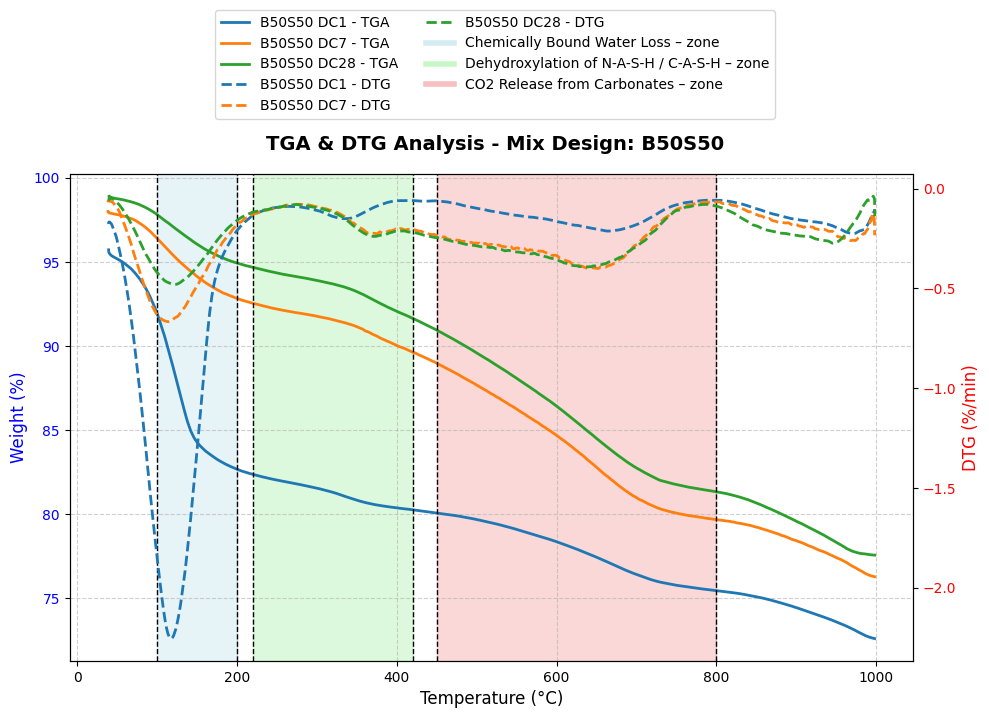

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_B50S50DC1; 14-1-2025-2.csv", "B50S50 DC1 - TGA"),
    ("TG_ExpDat_B50S50DC7; 23-1-2025-2.csv", "B50S50 DC7 - TGA"),
    ("TG_ExpDat_B50S50DC28; 13-2-2025-2.csv", "B50S50 DC28 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_B50S50DC1; 14-1-2025-2.csv", "B50S50 DC1 - DTG"),
    ("DG_ExpDat_B50S50DC7; 23-1-2025-2.csv", "B50S50 DC7 - DTG"),
    ("DG_ExpDat_B50S50DC28; 13-2-2025-2.csv", "B50S50 DC28 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis - Mix Design: B50S50", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


# TGA & DTG FOR: B30S70 VS A8% VS CEM I

## DC1:

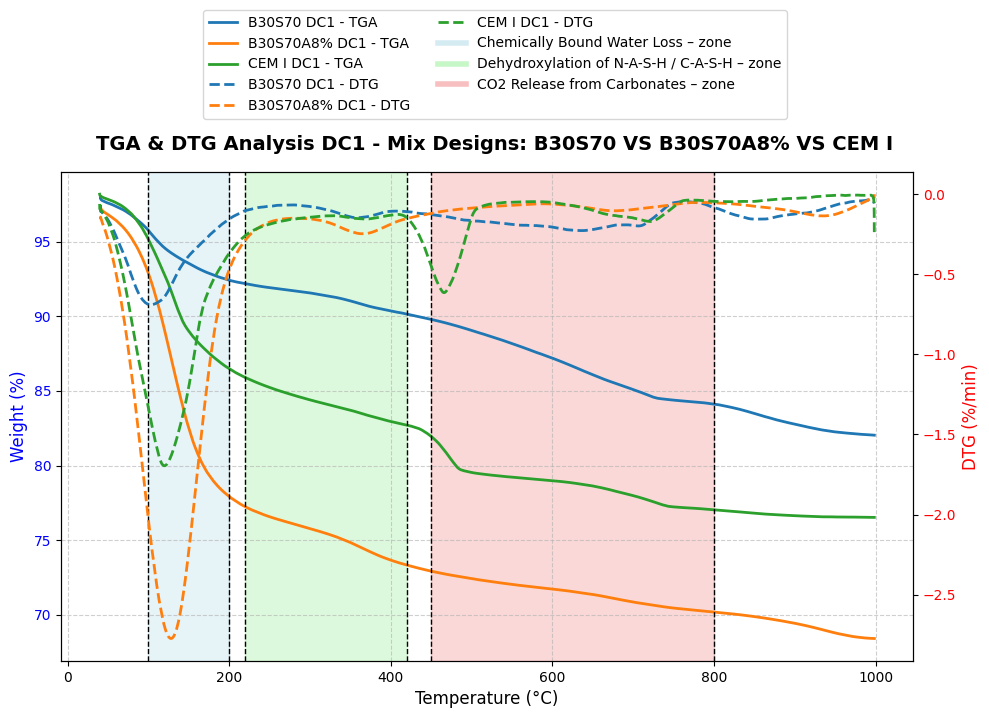

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_B30S70DC1; 14-1-2025-2.csv", "B30S70 DC1 - TGA"),
    ("TG_ExpDat_A8%DC1; 17-1-2025-2.csv", "B30S70A8% DC1 - TGA"),
    ("TG_ExpDat_CEM_I_DC1; 17-1-2025-2.csv", "CEM I DC1 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_B30S70DC1; 14-1-2025-2.csv", "B30S70 DC1 - DTG"),
    ("DG_ExpDat_A8%DC1; 17-1-2025-2.csv", "B30S70A8% DC1 - DTG"),
    ("DG_ExpDat_CEM_I_DC1; 17-1-2025-2.csv", "CEM I DC1 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis DC1 - Mix Designs: B30S70 VS B30S70A8% VS CEM I", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


## DC 14:

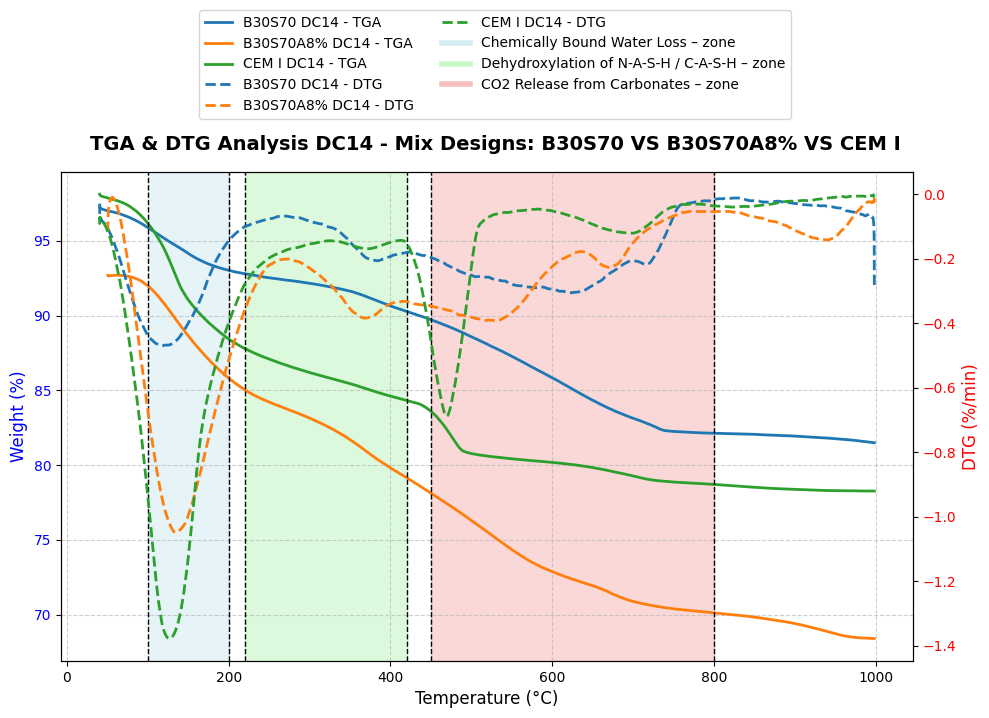

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_B30S70DC14; 30-1-2025-2.csv", "B30S70 DC14 - TGA"),
    ("TG_ExpDat_A8%DC14; 30-1-2025-2.csv", "B30S70A8% DC14 - TGA"),
    ("TG_ExpDat_CEM_I_DC14; 30-1-2025-2.csv", "CEM I DC14 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_B30S70DC14; 30-1-2025-2.csv", "B30S70 DC14 - DTG"),
    ("DG_ExpDat_A8%DC14; 30-1-2025-2.csv", "B30S70A8% DC14 - DTG"),
    ("DG_ExpDat_CEM_I_DC14; 30-1-2025-2.csv", "CEM I DC14 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis DC14 - Mix Designs: B30S70 VS B30S70A8% VS CEM I", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


## DC 28

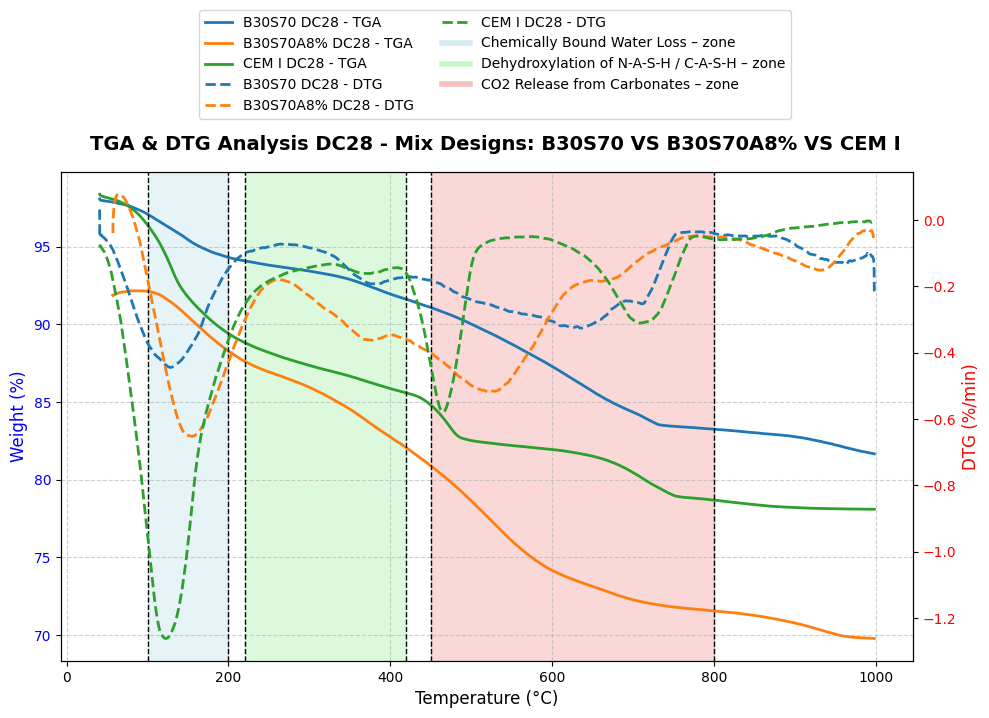

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_B30S70DC28; 13-2-2025-2.csv", "B30S70 DC28 - TGA"),
    ("TG_ExpDat_A8%DC28; 14-2-2025-2.csv", "B30S70A8% DC28 - TGA"),
    ("TG_ExpDat_CEM_I_DC28; 14-2-2025-2.csv", "CEM I DC28 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_B30S70DC28; 13-2-2025-2.csv", "B30S70 DC28 - DTG"),
    ("DG_ExpDat_A8%DC28; 14-2-2025-2.csv", "B30S70A8% DC28 - DTG"),
    ("DG_ExpDat_CEM_I_DC28; 14-2-2025-2.csv", "CEM I DC28 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis DC28 - Mix Designs: B30S70 VS B30S70A8% VS CEM I", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


# TGA & DTG FOR: CEM I VS B50S50OPC7% VS B50S50OPC9%


NOTE: FOR DC1, DC7 AND DC28

# DC1

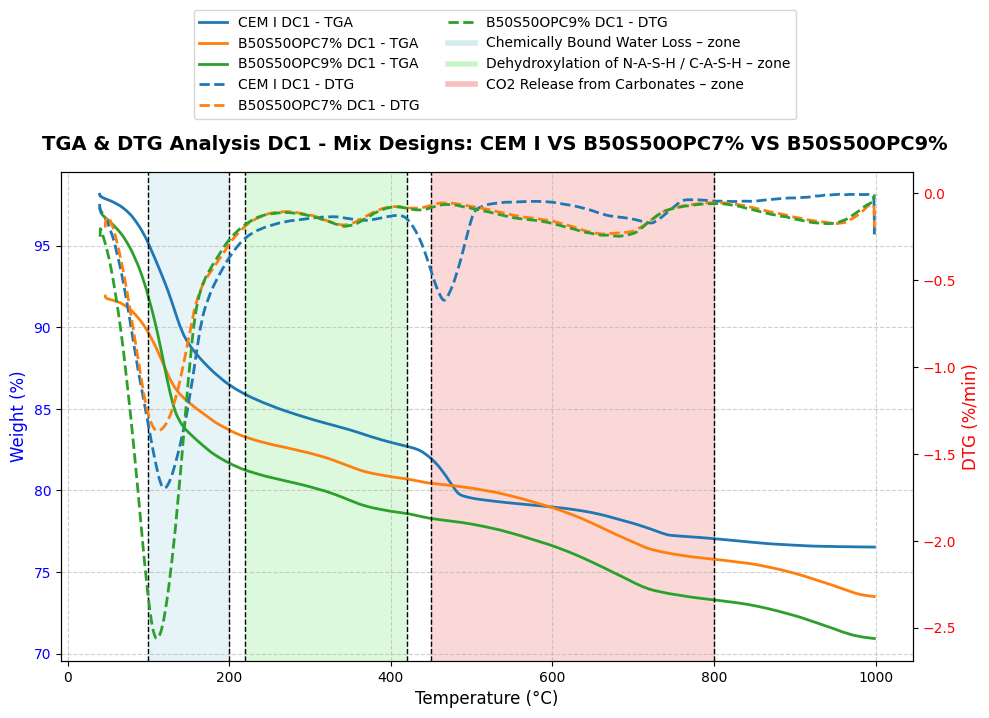

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_CEM_I_DC1; 17-1-2025-2.csv", "CEM I DC1 - TGA"),
    ("TG_ExpDat_OPC7%DC1; 14-1-2025-2.csv", "B50S50OPC7% DC1 - TGA"),
    ("TG_ExpDat_OPC9%DC1; 14-1-2025-2.csv", "B50S50OPC9% DC1 - TGA")
    
]

dtg_files = [
    ("DG_ExpDat_CEM_I_DC1; 17-1-2025-2.csv", "CEM I DC1 - DTG"),
    ("DG_ExpDat_OPC7%DC1; 14-1-2025-2.csv", "B50S50OPC7% DC1 - DTG"),
    ("DG_ExpDat_OPC9%DC1; 14-1-2025-2.csv", "B50S50OPC9% DC1 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis DC1 - Mix Designs: CEM I VS B50S50OPC7% VS B50S50OPC9%", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


## DC7 

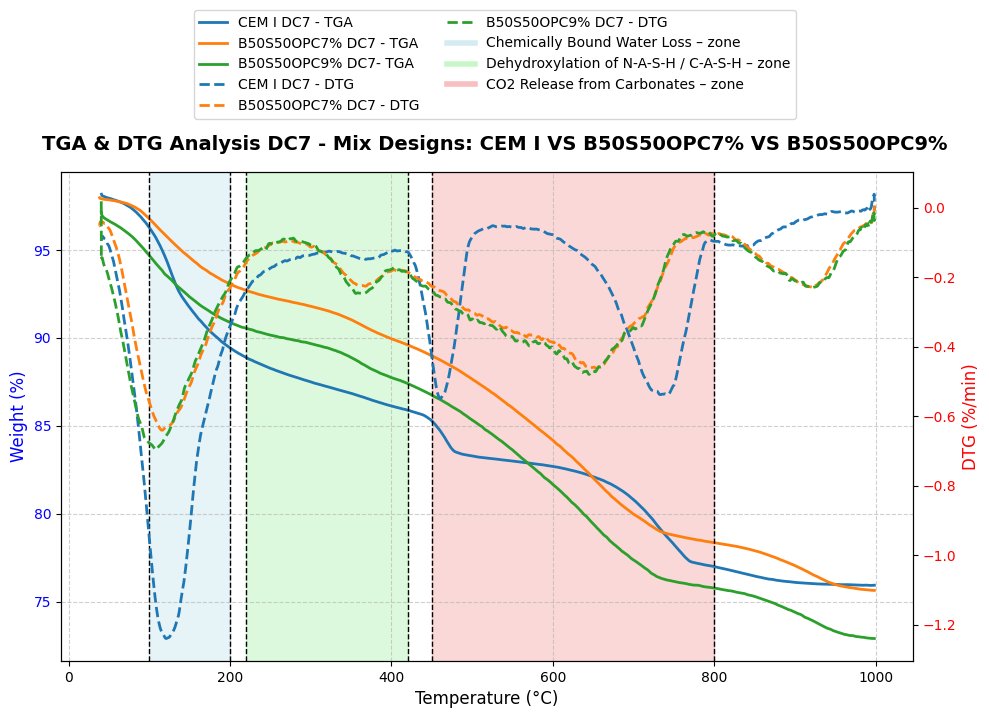

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_CEM_I_DC7; 23-1-2025-2.csv", "CEM I DC7 - TGA"),
    ("TG_ExpDat_OPC7%DC7; 23-1-2025-2.csv", "B50S50OPC7% DC7 - TGA"),
    ("TG_ExpDat_OPC9%DC7; 23-1-2025-2.csv", "B50S50OPC9% DC7- TGA")
    
]

dtg_files = [
    ("DG_ExpDat_CEM_I_DC7; 23-1-2025-2.csv", "CEM I DC7 - DTG"),
    ("DG_ExpDat_OPC7%DC7; 23-1-2025-2.csv", "B50S50OPC7% DC7 - DTG"),
    ("DG_ExpDat_OPC9%DC7; 23-1-2025-2.csv", "B50S50OPC9% DC7 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis DC7 - Mix Designs: CEM I VS B50S50OPC7% VS B50S50OPC9%", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


## DC28

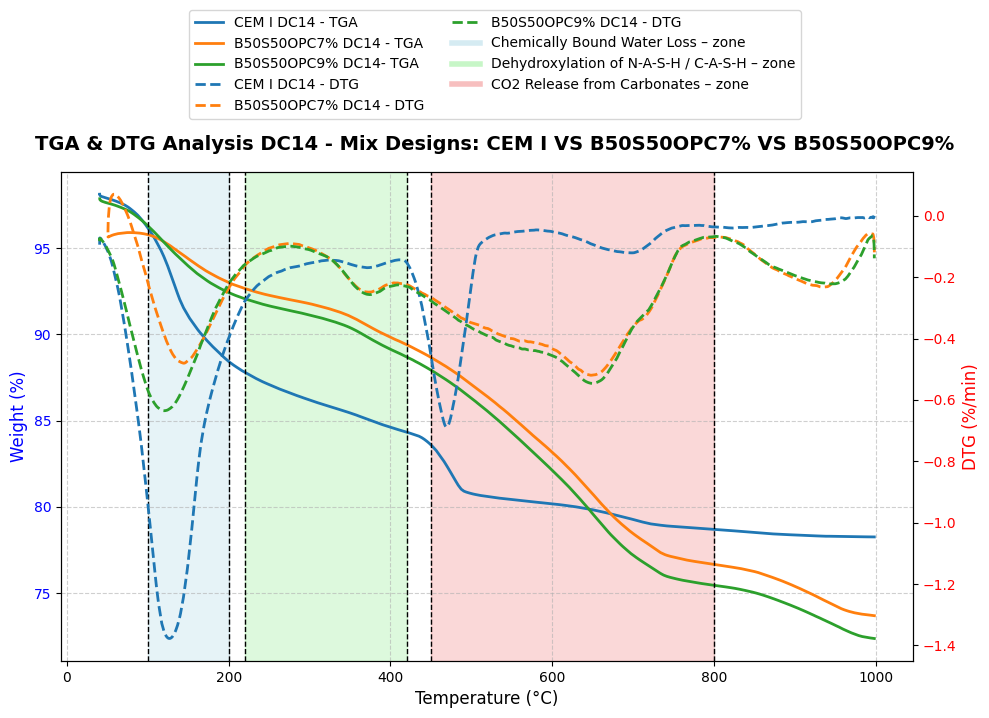

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Function to read and process TGA files
def process_tga(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=None)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["Weight%"] = pd.to_numeric(df.iloc[:, 3], errors="coerce")  # Assuming weight% is in column 3
    return df["Temperature"], df["Weight%"], label

# Function to read and process DTG files
def process_dtg(file, label):
    df = pd.read_csv(file, encoding="ISO-8859-1", skiprows=30, header=0)
    df.dropna(axis=1, how='all', inplace=True)  # Remove empty columns
    df.columns = ["Temperature"] + [f"Col_{i}" for i in range(1, len(df.columns))]  # Dynamic column assignment
    df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")
    df["DTG"] = pd.to_numeric(df.iloc[:, -2], errors="coerce")  # Assuming DTG is second last column
    return df["Temperature"], df["DTG"], label

# Get list of TGA and DTG CSV files with custom labels
tga_files = [
    ("TG_ExpDat_CEM_I_DC14; 30-1-2025-2.csv", "CEM I DC14 - TGA"),
    ("TG_ExpDat_OPC7%DC14; 30-1-2025-2.csv", "B50S50OPC7% DC14 - TGA"),
    ("TG_ExpDat_OPC9%DC14; 30-1-2025-2.csv", "B50S50OPC9% DC14- TGA")
    
]

dtg_files = [
    ("DG_ExpDat_CEM_I_DC14; 30-1-2025-2.csv", "CEM I DC14 - DTG"),
    ("DG_ExpDat_OPC7%DC14; 30-1-2025-2.csv", "B50S50OPC7% DC14 - DTG"),
    ("DG_ExpDat_OPC9%DC14; 30-1-2025-2.csv", "B50S50OPC9% DC14 - DTG")
    
]

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Define temperature boundaries for decomposition events
decomposition_zones = [
    (100, 200, "Chemically Bound Water Loss – zone", 'lightblue'),
    (220, 420, "Dehydroxylation of N-A-S-H / C-A-S-H – zone", 'lightgreen'),
    (450, 800, "CO2 Release from Carbonates – zone", 'lightcoral')
]

# Plot multiple TGA curves (Weight %)
for file, label in tga_files[:4]:  # Plot max 4 files
    temp, weight, label = process_tga(file, label)
    ax1.plot(temp, weight, label=label, linestyle='-', linewidth=2)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Weight (%)", fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot multiple DTG curves (DTG %/min)
for file, label in dtg_files[:4]:  # Plot max 4 files
    temp, dtg, label = process_dtg(file, label)
    ax2.plot(temp, dtg, label=label, linestyle='--', linewidth=2)
ax2.set_ylabel("DTG (%/min)", fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Draw vertical dashed lines for temperature boundaries
patches = []
for start, end, label, color in decomposition_zones:
    ax1.axvline(x=start, color='black', linestyle='dashed', linewidth=1)
    ax1.axvline(x=end, color='black', linestyle='dashed', linewidth=1)
    patch = plt.Rectangle((start, ax1.get_ylim()[0]), end-start, ax1.get_ylim()[1]-ax1.get_ylim()[0], color=color, alpha=0.3)
    ax1.add_patch(patch)
    patches.append((plt.Line2D([0], [0], color=color, lw=4, alpha=0.5), label))

# Add title and move it up for visibility
plt.subplots_adjust(top=0.85)
fig.suptitle("TGA & DTG Analysis DC14 - Mix Designs: CEM I VS B50S50OPC7% VS B50S50OPC9%", fontsize=14, fontweight='bold')

# Move legends to separate space and avoid duplicates
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles_patches, labels_patches = zip(*patches)
fig.legend(handles1 + handles2 + list(handles_patches), labels1 + labels2 + list(labels_patches),
           loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()
